In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
import numpy as np
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
import ndtest

In [2]:
#arquitectura neuronal
class HaloToGalaxyModel(nn.Module):
    def __init__(self, input_size=4, output_size=1, hidden_dim=64):
        super(HaloToGalaxyModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_dim) 
        self.fc2 = nn.Linear(hidden_dim, hidden_dim) 
        self.fc3 = nn.Linear(hidden_dim, output_size)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)  
        return x

# Función para cargar datos desde un CSV
def load_data_from_csv(file_path):
    data = pd.read_csv(file_path)
    X = data.iloc[:, 5:10].values  
    #y = data.iloc[:, 12:16].values  
    #y = data.iloc[:, 12].values  #esto sólo carga la masa,
    #y = data.iloc[:, 13].values #color
    #y = data.iloc[:, 14].values #radio
    #y = data.iloc[:, 15].values #sSFR   
    y1 = data.iloc[:, 12].values  #masa,
    y2 = data.iloc[:, 13].values #color 
    y3 = data.iloc[:, 14].values #radio 
    y4 = data.iloc[:, 15].values #sSFR  
    return X, y1,y2,y3,y4

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)


cuda


In [4]:
file_path = 'datasetcompleto.csv'  
X, stellar_mass,color ,radio,sSFR= load_data_from_csv(file_path)

In [5]:
X = torch.tensor(X, dtype=torch.float32).to(device)

In [6]:
modelfile = 'StellarMass.pth'
model = HaloToGalaxyModel(X.shape[1], 3, 100).to(device)
model.load_state_dict(torch.load(modelfile))
model.eval()
with torch.no_grad():
    stellar_mass_predicted = model(X)

stellar_mass_predicted = np.array(stellar_mass_predicted[:,1].cpu())

/tmp/ipykernel_115275/4079105968.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(modelfile))


In [7]:
print(stellar_mass_predicted)

[12.368937 12.573771 12.68092  ...  8.695773  9.385269  8.675026]


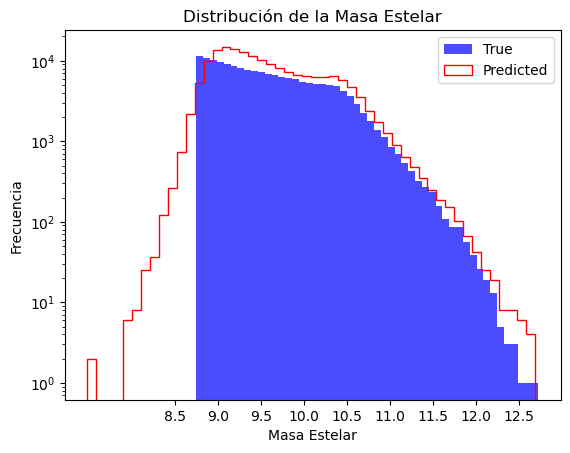

In [8]:
plt.hist(stellar_mass, bins=50, alpha=0.7, color='b',label="True")
plt.hist(stellar_mass_predicted, bins=50, color='r',histtype='step',label="Predicted")
plt.xlabel('Masa Estelar')
plt.ylabel('Frecuencia')
plt.yscale('log')
plt.legend()
plt.xticks(np.linspace(8.5, 12.5, num=9))
plt.title('Distribución de la Masa Estelar')

# Mostrar el gráfico
plt.show()

In [9]:
statistic, p_value = ks_2samp(stellar_mass, stellar_mass_predicted)
print("KS TEST masa")
print(f"Estadístico K-S: {statistic}")
print(f"Valor p: {p_value}")

KS TEST masa
Estadístico K-S: 0.04439168120834168
Valor p: 4.340976916528661e-150


In [10]:
modelfile = 'color1.pth'
model = HaloToGalaxyModel(X.shape[1], 3, 100).to(device)
model.load_state_dict(torch.load(modelfile))
model.eval()
with torch.no_grad():
    color_predicted = model(X)

color_predicted = np.array(color_predicted[:,1].cpu())

/tmp/ipykernel_115275/2802385425.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(modelfile))


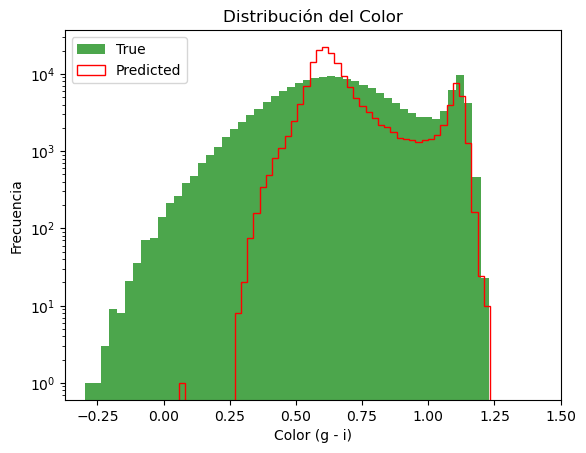

In [11]:

# Histograma del color
plt.hist(color, bins=50, alpha=0.7, color='g',label="True")
plt.hist(color_predicted, bins=50, color='r',histtype='step',label="Predicted")
plt.xlabel('Color (g - i)')
plt.ylabel('Frecuencia')
plt.xticks(np.linspace(-0.25, 1.50, num=8))
plt.yscale('log')
plt.title('Distribución del Color')
plt.legend()
plt.show()


In [12]:
statistic, p_value = ks_2samp(color, color_predicted)
print("KS TEST Color")
print(f"Estadístico K-S: {statistic}")
print(f"Valor p: {p_value}")

KS TEST Color
Estadístico K-S: 0.20601310181079613
Valor p: 0.0


In [13]:
modelfile = 'radio.pth'
model = HaloToGalaxyModel(X.shape[1], 3, 100).to(device)
model.load_state_dict(torch.load(modelfile))
model.eval()
with torch.no_grad():
    radio_predicted = model(X)

radio_predicted = np.array(radio_predicted[:,1].cpu())

/tmp/ipykernel_115275/2084015461.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(modelfile))


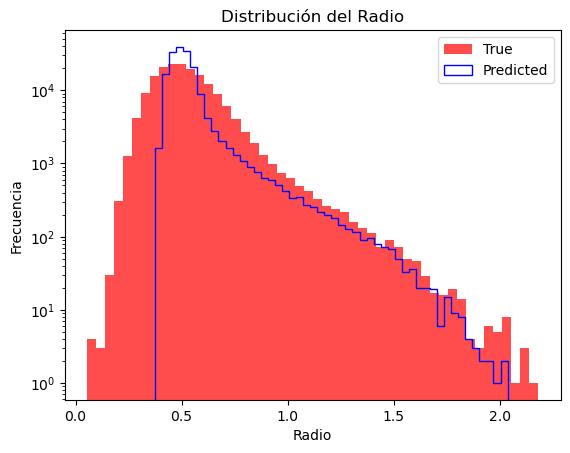

In [14]:
# Histograma del radio
plt.hist(radio, bins=50, alpha=0.7, color='r',label="True")
plt.hist(radio_predicted, bins=50, color='b',histtype='step',label="Predicted")
plt.xlabel('Radio')
plt.yscale('log')
plt.ylabel('Frecuencia')
plt.title('Distribución del Radio')
plt.legend()
plt.show()

In [15]:
statistic, p_value = ks_2samp(radio, radio_predicted)
print("KS TEST radio")
print(f"Estadístico K-S: {statistic}")
print(f"Valor p: {p_value}")

KS TEST radio
Estadístico K-S: 0.21348513888491577
Valor p: 0.0


In [16]:
modelfile = 'sSFR.pth'
model = HaloToGalaxyModel(X.shape[1], 3, 100).to(device)
model.load_state_dict(torch.load(modelfile))
model.eval()
with torch.no_grad():
    sSFR_predicted = model(X)

sSFR_predicted = np.array(sSFR_predicted[:,1].cpu())

/tmp/ipykernel_115275/263993569.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(modelfile))


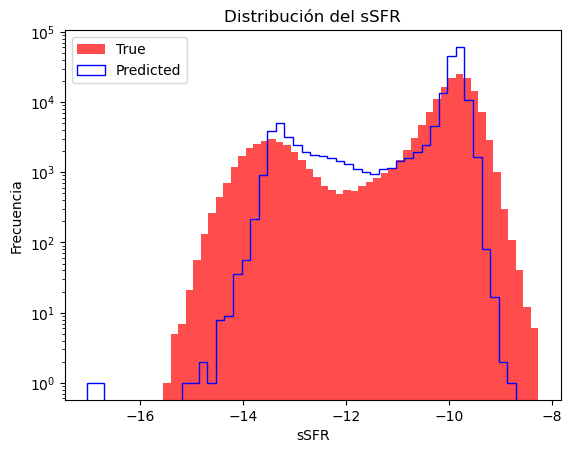

In [17]:
# Histograma del sSFR
plt.hist(sSFR, bins=50, alpha=0.7, color='r',label="True")
plt.hist(sSFR_predicted, bins=50, color='b',histtype='step',label="Predicted")
plt.xlabel('sSFR')
plt.yscale('log')
plt.ylabel('Frecuencia')
plt.title('Distribución del sSFR')
plt.legend()
plt.show()

In [18]:
statistic, p_value = ks_2samp(sSFR, sSFR_predicted)
print("KS TEST sSFR")
print(f"Estadístico K-S: {statistic}")
print(f"Valor p: {p_value}")

KS TEST sSFR
Estadístico K-S: 0.17870526647023488
Valor p: 0.0


In [19]:
def scatter_hist_original(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.hist2d(x, y,bins=50,cmap='jet')

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = 50
    ax_histx.hist(x, bins=bins,label="True")    
    ax_histy.hist(y, bins=bins, orientation='horizontal',label="True")    
    ax_histx.legend()
    ax_histy.legend()

In [20]:
def scatter_hist(x, y,x_pred,y_pred, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.hist2d(x_pred, y_pred,bins=50,cmap='jet')

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = 100
    ax_histx.hist(x, bins=bins,label="True")
    ax_histx.hist(x_pred, bins=bins,histtype='step',label="Predicted")
    ax_histy.hist(y, bins=bins, orientation='horizontal',label="True")
    ax_histy.hist(y_pred, bins=bins,histtype='step', orientation='horizontal',label="Predicted")
    ax_histx.legend()
    ax_histy.legend()

# MASA Y COLOR


# True

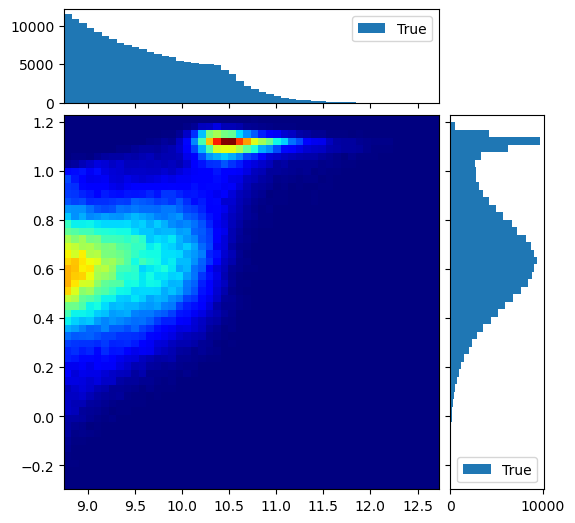

In [21]:
# Start with a square Figure.
fig = plt.figure(figsize=(6, 6))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal Axes and the main Axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
# Draw the scatter plot and marginals.
scatter_hist_original(stellar_mass, color, ax, ax_histx, ax_histy)

# Union

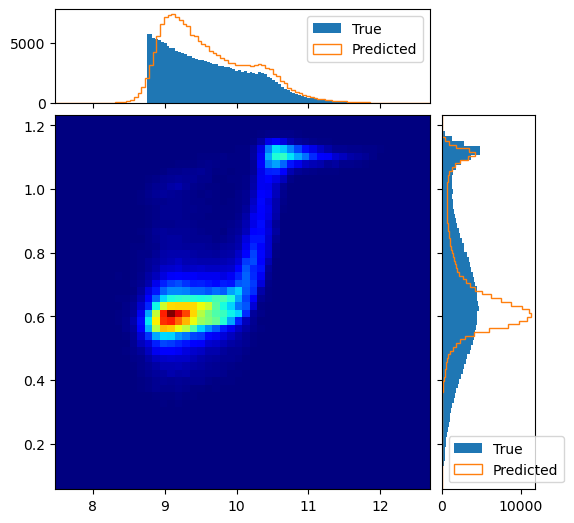

In [22]:


# Start with a square Figure.
fig = plt.figure(figsize=(6, 6))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal Axes and the main Axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
# Draw the scatter plot and marginals.
scatter_hist(stellar_mass, color,stellar_mass_predicted,color_predicted, ax, ax_histx, ax_histy)

In [23]:
union_flat_x = np.concatenate((stellar_mass,color),axis=0)
union_flat_y = np.concatenate((stellar_mass_predicted,color_predicted),axis=0)
 
statistic, p_value = ks_2samp(union_flat_x, union_flat_y)
print("KS Test Flatten")
print(f"Estadístico K-S: {statistic}")
print(f"Valor p: {p_value}")

statistic1, p_value1 = ks_2samp(stellar_mass, stellar_mass_predicted)
statistic2, p_value2 = ks_2samp(color, color_predicted)
print("KS Test promediado por columna")
print(f"Estadístico K-S: {(statistic1+statistic2)/2}")
print(f"Valor p: {(p_value1+p_value2)/2}")

KS Test Flatten
Estadístico K-S: 0.10300655090539806
Valor p: 0.0
KS Test promediado por columna
Estadístico K-S: 0.1252023915095689
Valor p: 2.1704884582643305e-150


# join



In [24]:
modelfile = 'masaycolor.pth'
model = HaloToGalaxyModel(X.shape[1], 6, 100).to(device)
model.load_state_dict(torch.load(modelfile))
model.eval()
with torch.no_grad():
    masaycolor_predicted = model(X)

masa_predicted_join = np.array(masaycolor_predicted[:,1].cpu())
color_predicted_join = np.array(masaycolor_predicted[:,4].cpu())

/tmp/ipykernel_115275/1517138920.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(modelfile))


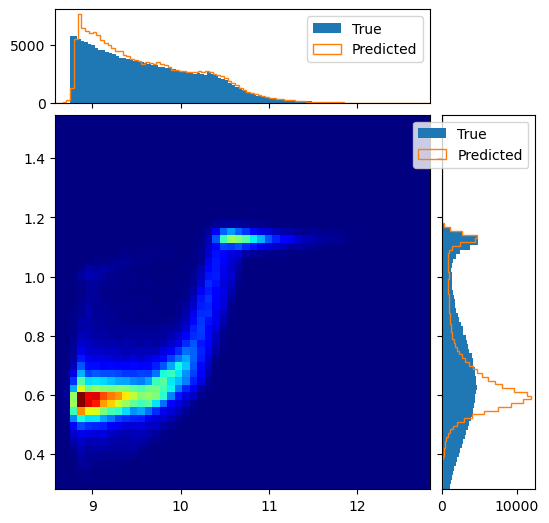

In [25]:
# Start with a square Figure.
fig = plt.figure(figsize=(6, 6))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal Axes and the main Axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
# Draw the scatter plot and marginals.
scatter_hist(stellar_mass, color,masa_predicted_join,color_predicted_join, ax, ax_histx, ax_histy)

In [26]:
join_flat_y = np.concatenate((masa_predicted_join,color_predicted_join),axis=0)
 
statistic, p_value = ks_2samp(union_flat_x, join_flat_y)
print("KS Test Flatten")
print(f"Estadístico K-S: {statistic}")
print(f"Valor p: {p_value}")

statistic1, p_value1 = ks_2samp(stellar_mass, masa_predicted_join)
statistic2, p_value2 = ks_2samp(color, color_predicted_join)
print("KS Test promediado por columna")
print(f"Estadístico K-S: {(statistic1+statistic2)/2}")
print(f"Valor p: {(p_value1+p_value2)/2}")

KS Test Flatten
Estadístico K-S: 0.09784592499356352
Valor p: 0.0
KS Test promediado por columna
Estadístico K-S: 0.11381411448350831
Valor p: 3.5698325528984677e-78


# ALL

In [27]:
modelfile = 'todos.pth'
model = HaloToGalaxyModel(X.shape[1], 12, 100).to(device)
model.load_state_dict(torch.load(modelfile))
model.eval()
with torch.no_grad():
    all_predicted = model(X)

masa_predicted_all = np.array(all_predicted[:,1].cpu())
color_predicted_all = np.array(all_predicted[:,4].cpu())

/tmp/ipykernel_115275/4238238654.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(modelfile))


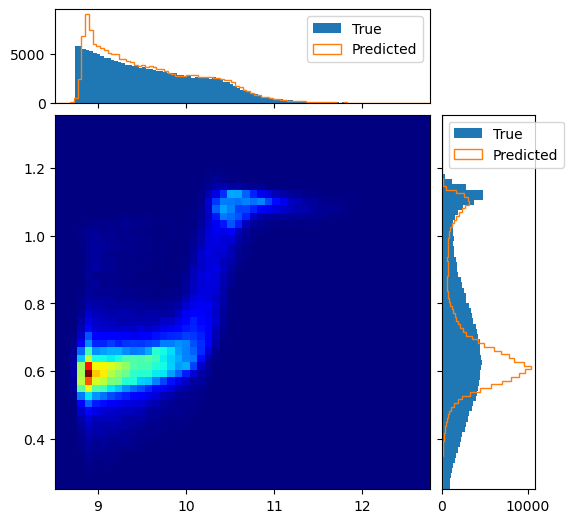

In [28]:
# Start with a square Figure.
fig = plt.figure(figsize=(6, 6))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal Axes and the main Axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
# Draw the scatter plot and marginals.
scatter_hist(stellar_mass, color,masa_predicted_all,color_predicted_all, ax, ax_histx, ax_histy)

In [29]:
all_flat_y = np.concatenate((masa_predicted_join,color_predicted_join),axis=0)
 
statistic, p_value = ks_2samp(union_flat_x, all_flat_y)
print("KS Test Flatten")
print(f"Estadístico K-S: {statistic}")
print(f"Valor p: {p_value}")

statistic1, p_value1 = ks_2samp(stellar_mass, masa_predicted_all)
statistic2, p_value2 = ks_2samp(color, color_predicted_all)
print("KS Test promediado por columna")
print(f"Estadístico K-S: {(statistic1+statistic2)/2}")
print(f"Valor p: {(p_value1+p_value2)/2}")

KS Test Flatten
Estadístico K-S: 0.09784592499356352
Valor p: 0.0
KS Test promediado por columna
Estadístico K-S: 0.11962697027776983
Valor p: 2.5418024826585066e-126
